# Create folders with training images for each domain

In [2]:
import os
os.getcwd()

'/home/ubuntu/Thesis-KNMI-FoggyGAN/notebooks'

In [3]:
os.chdir('/home/ubuntu/Thesis-KNMI-FoggyGAN/')

In [4]:
os.getcwd()

'/home/ubuntu/Thesis-KNMI-FoggyGAN'

# Prepare Dataset

I am going to load the images and store them in a compressed numpy array format.

Using code from https://machinelearningmastery.com/cyclegan-tutorial-with-keras/

In [4]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

def load_images(path, size=(384, 480)):
    data_list = list()
    for filename in os.listdir(path):
        # Load and resize image:
        pixels = load_img(os.path.join(path, filename), target_size=size)
        pixels = img_to_array(pixels) # Convert to numpy array
        data_list.append(pixels) # Store
    return asarray(data_list)
    
data_A = load_images('data/raw/trainA', size=(256, 256))
data_B = load_images('data/raw/trainB', size=(256, 256))

Check if images are all loaded in memory:

In [5]:
data_A.shape, data_B.shape

((1200, 256, 256, 3), (1187, 256, 256, 3))

# Check if images are indeed clear and foggy:

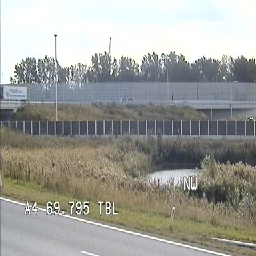

In [6]:
from keras.preprocessing.image import array_to_img

array_to_img(data_A[340]) # Shoud be clear

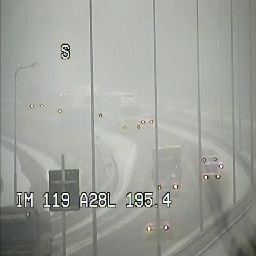

In [7]:
array_to_img(data_B[340]) # Shoud be foggy

In [8]:
from numpy import savez_compressed

# Save dataset as compressed numpy array

fpath = 'data/processed/clear2foggy256x256.npz'
savez_compressed(fpath, data_A, data_B)

# Test if images are correctly stored:

Loaded:  (1200, 256, 256, 3) (1187, 256, 256, 3)


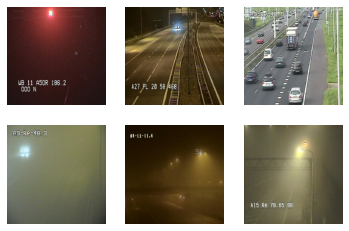

In [5]:
# load and plot the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('data/processed/clear2foggy256x256.npz')
dataA, dataB = data['arr_0'], data['arr_1']
print('Loaded: ', dataA.shape, dataB.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(dataB[i].astype('uint8'))
pyplot.show()